## Importing required packages

In [48]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib
# !pip install collections
# !pip install gdown

from collections import Counter
from numpy import mean, std
import numpy as np
from pandas import read_csv
import pandas as pd
import seaborn as sns
import gdown

import copy
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from credit_data_actual_values import substitute

## Downloading the data

In [31]:
# Download from Google Drive
#url = 'https://drive.google.com/uc?id=' + '1WC-3iPQJrud1WTer883rYdHMHGqgIVJ9' #(URI ID)
#output = '/home/user/data/german.data' # Destination directory
#gdown.download(url, output, quiet=False) 

Downloading...
From: https://drive.google.com/uc?id=1WC-3iPQJrud1WTer883rYdHMHGqgIVJ9
To: C:\Users\LENOVO\Downloads
100%|█████████████████████████████████████████████████████████████████████████████| 79.8k/79.8k [00:00<00:00, 25.6MB/s]


'C:/Users/LENOVO/Downloads'

In [8]:
#Load the data using pandas read_csv method
#df=read_csv(output, sep=" ", header=None)
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\german.data",sep=" ",header=None)
#Display the first few rows in the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
#Download directly from website
#df=read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",\
#               sep=" ",header=None)
#Display first few rows in the data frame
#df.head()


## Data Visualization

In [9]:
# Displaying data in human readable form with method substitute
# Make replica of the data for converting all the attribute values into human readable form
df_vis = copy.deepcopy(df)
# Call the method substitute from credit_data_actual_values.py to display the real world values
df_vis = substitute(df_vis)

In [30]:
# Display the first few rows of the data
#df_vis.set_index("Status of existing checking account",inplace=False).head(2)
df_vis.head(5)
#df_vis.sort_values("Credit amount",ascending=False)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


In [18]:
#Checking of missing values
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [11]:
df_vis.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [12]:
#Prepare data 
# split the data frame into inputs and outputs
te = len(df.columns)-1
X, y = df.drop(te, axis=1), df[te]
X.head()
#y.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Categorical features has to be converted into integer values for the model to process. 
#This is done through one hot encoding.
# select categorical features
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
# one hot encode categorical features only
ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
X = ct.fit_transform(X)
# label encode the target variable to have the classes 0 and 1
y = LabelEncoder().fit_transform(y)
print(X.shape, y.shape, Counter(y))

cat_ix

(1000, 61) (1000,) Counter({0: 700, 1: 300})


Int64Index([0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19], dtype='int64')

In [14]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [22]:
df.corr()

,1,4,7,10,12,15,17,20
1,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
4,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
7,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
10,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
12,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
15,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
17,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
20,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


In [16]:
df_vis.keys()

Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'Cost Matrix(Risk)'],
      dtype='object')

In [26]:
#Possible outcomes-output categories
df_vis['Cost Matrix(Risk)'].describe()


count          1000
unique            2
top       Good Risk
freq            700
Name: Cost Matrix(Risk), dtype: object

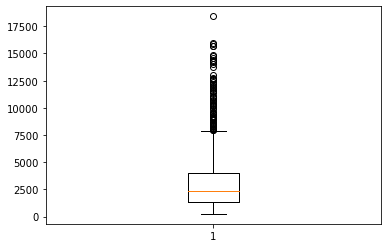

In [31]:
plt.boxplot(df_vis["Credit amount"])
plt.show()

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>]], dtype=object)

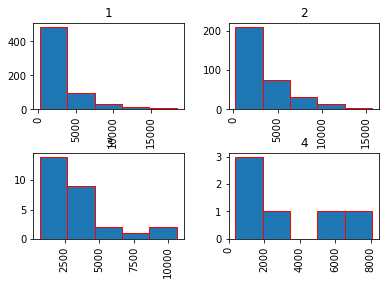

In [43]:
df_vis.hist(column='Credit amount',by = 'Number of existing credits at this bank',ec='red',bins = 5)

In [44]:
#creating pipelines for LogisticRegression,DecisionTreeClassifier,svm,GaussianNB
#Pipeline includes
#Data preprocessing include minmaxscalar
#Reducing dimensionality using PCA
#Training Models


In [57]:
#LogisticRegression 
LogisticRegressionPipeline = Pipeline([('myscaler',MinMaxScaler()),
                                      ('mypca',PCA(n_components=3)),
                                       ('LogisticClassifier',LogisticRegression())])

In [54]:
#DecisionTreeClassifier
DecisionTreePipeline = Pipeline([('myscaler',MinMaxScaler()),
                                 ('mypca',PCA(n_components=3)),
                                 ('DecisionTreeClassifier',DecisionTreeClassifier())])

In [63]:
#svm
SVMPipeline = Pipeline([('myscaler',MinMaxScaler()),
                                 ('mypca',PCA(n_components=3)),
                                 ('SupportVector',SVC())])

In [56]:
#GaussianNB
GaussianNBPipeline = Pipeline([('myscaler',MinMaxScaler()),
                                 ('mypca',PCA(n_components=3)),
                                 ('GaussianNB',GaussianNB())])

In [60]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RandomForestPipeline = Pipeline([('myscaler',MinMaxScaler()),
                                 ('mypca',PCA(n_components=3)),
                                 ('RandomForestClassifier',RandomForestClassifier())])

In [64]:
#Defining Pipeline
mypipeline = [LogisticRegressionPipeline,DecisionTreePipeline,SVMPipeline,GaussianNBPipeline,RandomForestPipeline]

In [62]:
#Definevariables to choose best model
accuracy = 0.0
classifier = 0
pipeline =""

In [68]:
#creating dictionary of pipeline and train models
PipelineDict = {0:'LogisticRegression',1:'DecisionTree',2:'SVM',3:'GaussianNB',4:'RandomForest'}

#fit pipeline
for mypipe in mypipeline:
    mypipe.fit(X_train,y_train)

In [72]:
#test accuracy for all classifiers
for i,model in enumerate(mypipeline):
    print("{} Accuracy: {}".format(PipelineDict[i],model.score(X_test,y_test)))

LogisticRegression Accuracy: 0.69
DecisionTree Accuracy: 0.595
SVM Accuracy: 0.67
GaussianNB Accuracy: 0.685
RandomForest Accuracy: 0.665


In [77]:
#Choose best model
for i,model in enumerate(mypipeline):
    if model.score(X_test,y_test)>accuracy:
        accuracy = model.score(X_test,y_test)
        classifier = i
        pipeline = model
print("Best accurate Classifier :{}".format(PipelineDict[classifier]))

Best accurate Classifier :LogisticRegression
